# Combinating features

###  Combination of cross-correlation + summaries

Our feature matrix becomes a concatenation of the cross-correlations, the summaries and the fft features obtained in the three previous sections

In [195]:
def combining_features(df):
    y_s = list(df.y)  
    df = df.iloc[:,5:] # timeseries features only
    freq_features = FourierTransformer(k = 15, aggregate = "exclusive" ).fit_transform(df.values, y = y_s)
    df_freq = pd.DataFrame(freq_features)
    df_freq.columns = [str(i) for i in df_freq.columns]
    df_corr = to_corr_features(df)
    df_summ = apply_summaries(df, summaries)
    X = pd.concat([df_summ,df_corr,df_freq], axis = 1)
    
    return X

#### Grid Search

In [206]:
model = SVC(class_weight='balanced')
params = {'C' : np.linspace(0.01,0.5,5),
          'kernel':['linear',"poly"]}
skf = StratifiedKFold(n_splits=4,  shuffle=True)

cv = GridSearchCV(
    model, 
    param_grid=params, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    cv=skf.split(X, df_train.y)
)
cv.fit(X,df_train.y)

cv.best_params_, cv.best_score_

({'C': 0.5, 'kernel': 'poly'}, 0.5933990442054958)

#### Fit Model

In [210]:
# Obtaining Combined Features
X = combining_features(df_train)
# Split data stratifying to assure a balanced number of classess
X_train, X_test, y_train, y_test = train_test_split(X, df_train.y, test_size=0.3, stratify=df_train.y)

model = SVC(class_weight='balanced', C = 0,1 , kernel = "linear")

model.fit(X_train, y_train)

SVC(C=0.5, class_weight='balanced', kernel='linear')

(array([[171,  15,   0],
        [  9,   3,   0],
        [  0,   1,   0]]),
 0.3897849462365592)

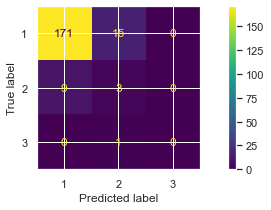

In [212]:
y_hat = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
confusion_matrix(y_test,y_hat),balanced_accuracy_score(y_test, y_hat)

### Combination usind tsfel library

Here we use a python library that extracts 389 different features from each time series, including a combination of statistical, temporal and spectral features

In [285]:
cfg = tsfel.get_features_by_domain()
df_extended_features = pd.DataFrame()

for j in tqdm(range(len(df))):
# Convert one row into a df ready for feature extraction
    index = 0
    df_test = {}
    for i in range(24):
        df_test[i] =  df.iloc[j,index:2048*(i+1)].values
        index += 2048
    df_ts_extract = pd.DataFrame(df_test)
    X = tsfel.time_series_features_extractor(cfg, df_ts_extract)
    df_extended_features = pd.concat([df_extended_features,X])

  0%|          | 0/663 [00:00<?, ?it/s]

*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  0%|          | 1/663 [00:01<15:16,  1.39s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  0%|          | 2/663 [00:02<15:54,  1.44s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  0%|          | 3/663 [00:04<16:54,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  1%|          | 4/663 [00:06<16:49,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  1%|          | 5/663 [00:07<18:28,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  1%|          | 6/663 [00:09<19:33,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  1%|          | 7/663 [00:12<20:36,  1.88s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  1%|          | 8/663 [00:13<20:41,  1.90s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  1%|▏         | 9/663 [00:16<22:02,  2.02s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 10/663 [00:18<21:28,  1.97s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 11/663 [00:19<19:36,  1.80s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 12/663 [00:20<17:38,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 13/663 [00:21<16:07,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 14/663 [00:23<15:08,  1.40s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 15/663 [00:24<14:30,  1.34s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  2%|▏         | 16/663 [00:25<14:02,  1.30s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 17/663 [00:26<13:46,  1.28s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 18/663 [00:27<13:24,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 19/663 [00:29<13:11,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 20/663 [00:30<13:06,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 21/663 [00:31<12:59,  1.21s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 22/663 [00:32<12:57,  1.21s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  3%|▎         | 23/663 [00:34<14:24,  1.35s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  4%|▎         | 24/663 [00:36<15:06,  1.42s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  4%|▍         | 25/663 [00:37<15:07,  1.42s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  4%|▍         | 26/663 [00:38<15:02,  1.42s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  4%|▍         | 27/663 [00:40<15:03,  1.42s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  4%|▍         | 28/663 [00:41<15:21,  1.45s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  4%|▍         | 29/663 [00:43<14:40,  1.39s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▍         | 30/663 [00:44<14:10,  1.34s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▍         | 31/663 [00:45<13:49,  1.31s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▍         | 32/663 [00:46<13:25,  1.28s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▍         | 33/663 [00:47<13:23,  1.28s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▌         | 34/663 [00:49<14:57,  1.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▌         | 35/663 [00:51<15:57,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  5%|▌         | 36/663 [00:53<16:24,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▌         | 37/663 [00:55<17:27,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▌         | 38/663 [00:56<16:53,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▌         | 39/663 [00:57<16:02,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▌         | 40/663 [00:59<15:18,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▌         | 41/663 [01:00<14:42,  1.42s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▋         | 42/663 [01:01<14:07,  1.36s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  6%|▋         | 43/663 [01:02<13:29,  1.31s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  7%|▋         | 44/663 [01:04<13:15,  1.29s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  7%|▋         | 45/663 [01:05<13:06,  1.27s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  7%|▋         | 46/663 [01:06<12:51,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  7%|▋         | 47/663 [01:07<12:41,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  7%|▋         | 48/663 [01:09<12:32,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  7%|▋         | 49/663 [01:10<12:27,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 50/663 [01:11<12:30,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 51/663 [01:12<12:33,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 52/663 [01:13<12:33,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 53/663 [01:15<12:25,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 54/663 [01:16<12:19,  1.21s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 55/663 [01:17<12:35,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  8%|▊         | 56/663 [01:18<12:28,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  9%|▊         | 57/663 [01:20<12:27,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  9%|▊         | 58/663 [01:21<12:18,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  9%|▉         | 59/663 [01:22<12:18,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  9%|▉         | 60/663 [01:23<12:22,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  9%|▉         | 61/663 [01:25<12:44,  1.27s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


  9%|▉         | 62/663 [01:26<12:34,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|▉         | 63/663 [01:27<12:24,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|▉         | 64/663 [01:28<12:19,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|▉         | 65/663 [01:29<12:04,  1.21s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|▉         | 66/663 [01:31<12:07,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|█         | 67/663 [01:32<12:06,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|█         | 68/663 [01:33<12:10,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 10%|█         | 69/663 [01:34<12:10,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█         | 70/663 [01:36<12:10,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█         | 71/663 [01:37<12:18,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█         | 72/663 [01:38<12:17,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█         | 73/663 [01:39<12:16,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█         | 74/663 [01:41<12:18,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█▏        | 75/663 [01:42<12:12,  1.25s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 11%|█▏        | 76/663 [01:43<11:55,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 12%|█▏        | 77/663 [01:44<11:59,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 12%|█▏        | 78/663 [01:46<12:08,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 12%|█▏        | 79/663 [01:47<12:00,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 12%|█▏        | 80/663 [01:48<12:03,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 12%|█▏        | 81/663 [01:49<11:56,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 12%|█▏        | 82/663 [01:51<11:59,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 83/663 [01:52<11:46,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 84/663 [01:53<11:38,  1.21s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 85/663 [01:54<11:53,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 86/663 [01:55<11:45,  1.22s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 87/663 [01:57<11:49,  1.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 88/663 [01:58<11:54,  1.24s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 13%|█▎        | 89/663 [01:59<12:14,  1.28s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▎        | 90/663 [02:01<12:10,  1.27s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▎        | 91/663 [02:02<12:29,  1.31s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▍        | 92/663 [02:04<14:39,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▍        | 93/663 [02:06<15:55,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▍        | 94/663 [02:08<16:42,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▍        | 95/663 [02:10<17:48,  1.88s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 14%|█▍        | 96/663 [02:12<17:06,  1.81s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 15%|█▍        | 97/663 [02:13<15:41,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 15%|█▍        | 98/663 [02:15<15:12,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 15%|█▍        | 99/663 [02:16<14:16,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 15%|█▌        | 100/663 [02:17<14:09,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 15%|█▌        | 101/663 [02:19<13:25,  1.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 15%|█▌        | 102/663 [02:20<13:37,  1.46s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▌        | 103/663 [02:21<13:08,  1.41s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▌        | 104/663 [02:23<13:17,  1.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▌        | 105/663 [02:24<13:20,  1.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▌        | 106/663 [02:26<13:22,  1.44s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▌        | 107/663 [02:27<13:30,  1.46s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▋        | 108/663 [02:29<13:31,  1.46s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 16%|█▋        | 109/663 [02:30<13:00,  1.41s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 110/663 [02:31<12:27,  1.35s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 111/663 [02:33<12:52,  1.40s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 112/663 [02:34<12:40,  1.38s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 113/663 [02:36<13:39,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 114/663 [02:37<13:40,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 115/663 [02:39<13:04,  1.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 17%|█▋        | 116/663 [02:40<12:51,  1.41s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 18%|█▊        | 117/663 [02:42<13:04,  1.44s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 18%|█▊        | 118/663 [02:43<13:11,  1.45s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 18%|█▊        | 119/663 [02:45<13:22,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 18%|█▊        | 120/663 [02:46<13:50,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 18%|█▊        | 121/663 [02:48<14:12,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 18%|█▊        | 122/663 [02:49<13:22,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▊        | 123/663 [02:51<13:09,  1.46s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▊        | 124/663 [02:52<12:50,  1.43s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▉        | 125/663 [02:53<13:01,  1.45s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▉        | 126/663 [02:55<13:19,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▉        | 127/663 [02:57<14:30,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▉        | 128/663 [02:59<14:36,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 19%|█▉        | 129/663 [03:00<13:56,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 20%|█▉        | 130/663 [03:02<13:48,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 20%|█▉        | 131/663 [03:03<13:46,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 20%|█▉        | 132/663 [03:04<13:18,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 20%|██        | 133/663 [03:06<13:34,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 20%|██        | 134/663 [03:07<13:10,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 20%|██        | 135/663 [03:09<12:42,  1.44s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██        | 136/663 [03:10<13:01,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██        | 137/663 [03:12<13:21,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██        | 138/663 [03:14<13:39,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██        | 139/663 [03:15<13:01,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██        | 140/663 [03:17<13:12,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██▏       | 141/663 [03:18<13:16,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 21%|██▏       | 142/663 [03:19<12:46,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 143/663 [03:21<13:05,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 144/663 [03:23<13:11,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 145/663 [03:24<12:53,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 146/663 [03:25<12:42,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 147/663 [03:27<13:08,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 148/663 [03:29<13:06,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 22%|██▏       | 149/663 [03:30<12:43,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 23%|██▎       | 150/663 [03:32<13:01,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 23%|██▎       | 151/663 [03:33<13:13,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 23%|██▎       | 152/663 [03:35<12:43,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 23%|██▎       | 153/663 [03:36<12:58,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 23%|██▎       | 154/663 [03:38<13:33,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 23%|██▎       | 155/663 [03:40<14:27,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▎       | 156/663 [03:42<14:27,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▎       | 157/663 [03:43<13:51,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▍       | 158/663 [03:45<13:44,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▍       | 159/663 [03:46<13:08,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▍       | 160/663 [03:48<13:09,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▍       | 161/663 [03:49<12:46,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 24%|██▍       | 162/663 [03:51<12:52,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▍       | 163/663 [03:52<12:33,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▍       | 164/663 [03:54<12:50,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▍       | 165/663 [03:55<12:30,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▌       | 166/663 [03:57<12:47,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▌       | 167/663 [03:58<12:37,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▌       | 168/663 [04:00<12:59,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 25%|██▌       | 169/663 [04:02<12:46,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 26%|██▌       | 170/663 [04:03<12:19,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 26%|██▌       | 171/663 [04:04<12:29,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 26%|██▌       | 172/663 [04:06<12:21,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 26%|██▌       | 173/663 [04:07<12:02,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 26%|██▌       | 174/663 [04:09<11:50,  1.45s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 26%|██▋       | 175/663 [04:10<12:11,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 176/663 [04:12<12:17,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 177/663 [04:13<12:09,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 178/663 [04:15<12:22,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 179/663 [04:16<12:14,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 180/663 [04:18<11:55,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 181/663 [04:19<12:08,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 27%|██▋       | 182/663 [04:21<12:04,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 28%|██▊       | 183/663 [04:22<11:47,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 28%|██▊       | 184/663 [04:24<11:59,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 28%|██▊       | 185/663 [04:25<12:04,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 28%|██▊       | 186/663 [04:27<11:53,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 28%|██▊       | 187/663 [04:28<11:41,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 28%|██▊       | 188/663 [04:30<11:26,  1.44s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▊       | 189/663 [04:31<11:07,  1.41s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▊       | 190/663 [04:33<12:18,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▉       | 191/663 [04:35<13:20,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▉       | 192/663 [04:37<13:13,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▉       | 193/663 [04:38<12:53,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▉       | 194/663 [04:40<12:26,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 29%|██▉       | 195/663 [04:41<12:23,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|██▉       | 196/663 [04:43<12:17,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|██▉       | 197/663 [04:44<12:03,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|██▉       | 198/663 [04:46<12:04,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|███       | 199/663 [04:47<12:04,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|███       | 200/663 [04:49<12:02,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|███       | 201/663 [04:51<12:05,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 30%|███       | 202/663 [04:52<11:47,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 31%|███       | 203/663 [04:53<11:34,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 31%|███       | 204/663 [04:55<11:24,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 31%|███       | 205/663 [04:56<11:19,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 31%|███       | 206/663 [04:58<11:14,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 31%|███       | 207/663 [04:59<11:35,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 31%|███▏      | 208/663 [05:01<11:46,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 209/663 [05:03<11:31,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 210/663 [05:04<11:46,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 211/663 [05:06<11:52,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 212/663 [05:07<11:44,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 213/663 [05:09<11:45,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 214/663 [05:10<11:42,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 32%|███▏      | 215/663 [05:12<12:06,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 216/663 [05:14<12:18,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 217/663 [05:15<11:58,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 218/663 [05:17<11:41,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 219/663 [05:19<11:37,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 220/663 [05:20<11:36,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 221/663 [05:22<11:34,  1.57s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 33%|███▎      | 222/663 [05:23<11:43,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 34%|███▎      | 223/663 [05:25<11:50,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 34%|███▍      | 224/663 [05:27<11:36,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 34%|███▍      | 225/663 [05:28<11:30,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 34%|███▍      | 226/663 [05:30<11:40,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 34%|███▍      | 227/663 [05:31<11:31,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 34%|███▍      | 228/663 [05:33<11:31,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▍      | 229/663 [05:34<11:24,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▍      | 230/663 [05:36<11:36,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▍      | 231/663 [05:38<11:44,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▍      | 232/663 [05:39<11:46,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▌      | 233/663 [05:41<11:37,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▌      | 234/663 [05:43<11:53,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 35%|███▌      | 235/663 [05:45<12:01,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 36%|███▌      | 236/663 [05:46<12:02,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 36%|███▌      | 237/663 [05:48<12:23,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 36%|███▌      | 238/663 [05:50<13:03,  1.84s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 36%|███▌      | 239/663 [05:53<14:09,  2.00s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 36%|███▌      | 240/663 [05:54<13:11,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 36%|███▋      | 241/663 [05:56<12:19,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 242/663 [05:57<11:39,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 243/663 [05:58<11:12,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 244/663 [06:00<10:52,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 245/663 [06:01<10:39,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 246/663 [06:03<10:29,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 247/663 [06:04<10:18,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 37%|███▋      | 248/663 [06:06<10:10,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 249/663 [06:07<10:05,  1.46s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 250/663 [06:09<10:03,  1.46s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 251/663 [06:10<10:24,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 252/663 [06:12<10:41,  1.56s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 253/663 [06:14<11:03,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 254/663 [06:15<11:06,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 38%|███▊      | 255/663 [06:17<10:44,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 39%|███▊      | 256/663 [06:18<10:27,  1.54s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 39%|███▉      | 257/663 [06:20<10:18,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 39%|███▉      | 258/663 [06:21<10:10,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 39%|███▉      | 259/663 [06:23<10:17,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 39%|███▉      | 260/663 [06:24<10:09,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 39%|███▉      | 261/663 [06:26<10:57,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|███▉      | 262/663 [06:28<10:53,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|███▉      | 263/663 [06:29<10:34,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|███▉      | 264/663 [06:31<10:11,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|███▉      | 265/663 [06:32<09:55,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|████      | 266/663 [06:34<09:45,  1.47s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|████      | 267/663 [06:35<09:53,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 40%|████      | 268/663 [06:37<10:03,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████      | 269/663 [06:38<09:52,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████      | 270/663 [06:40<09:43,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████      | 271/663 [06:41<09:40,  1.48s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████      | 272/663 [06:43<09:45,  1.50s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████      | 273/663 [06:44<09:48,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████▏     | 274/663 [06:46<09:54,  1.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 41%|████▏     | 275/663 [06:47<09:45,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 42%|████▏     | 276/663 [06:49<09:37,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 42%|████▏     | 277/663 [06:50<09:46,  1.52s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 42%|████▏     | 278/663 [06:52<09:39,  1.51s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 42%|████▏     | 279/663 [06:53<09:32,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 42%|████▏     | 280/663 [06:55<09:54,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 42%|████▏     | 281/663 [06:56<10:05,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 282/663 [06:58<10:34,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 283/663 [07:00<10:20,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 284/663 [07:01<09:58,  1.58s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 285/663 [07:03<09:47,  1.55s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 286/663 [07:05<10:03,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 287/663 [07:06<10:29,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 43%|████▎     | 288/663 [07:08<10:32,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▎     | 289/663 [07:10<10:49,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▎     | 290/663 [07:12<11:09,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▍     | 291/663 [07:14<11:36,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▍     | 292/663 [07:16<11:52,  1.92s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▍     | 293/663 [07:18<12:34,  2.04s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▍     | 294/663 [07:20<12:02,  1.96s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 44%|████▍     | 295/663 [07:22<12:20,  2.01s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 45%|████▍     | 296/663 [07:24<11:50,  1.94s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 45%|████▍     | 297/663 [07:26<11:27,  1.88s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 45%|████▍     | 298/663 [07:27<10:52,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 45%|████▌     | 299/663 [07:29<10:37,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 45%|████▌     | 300/663 [07:31<10:17,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 45%|████▌     | 301/663 [07:32<10:07,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▌     | 302/663 [07:34<10:01,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▌     | 303/663 [07:36<10:08,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▌     | 304/663 [07:37<10:14,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▌     | 305/663 [07:39<09:53,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▌     | 306/663 [07:40<09:48,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▋     | 307/663 [07:42<09:44,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 46%|████▋     | 308/663 [07:44<09:37,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 47%|████▋     | 309/663 [07:45<09:42,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 47%|████▋     | 310/663 [07:47<09:34,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 47%|████▋     | 311/663 [07:49<09:30,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 47%|████▋     | 312/663 [07:50<09:23,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 47%|████▋     | 313/663 [07:52<09:23,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 47%|████▋     | 314/663 [07:53<09:23,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 315/663 [07:55<09:20,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 316/663 [07:57<09:23,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 317/663 [07:58<09:13,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 318/663 [08:00<09:08,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 319/663 [08:01<09:09,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 320/663 [08:03<09:07,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 48%|████▊     | 321/663 [08:05<09:03,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▊     | 322/663 [08:06<09:07,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▊     | 323/663 [08:08<09:54,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▉     | 324/663 [08:10<10:12,  1.81s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▉     | 325/663 [08:12<10:24,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▉     | 326/663 [08:14<10:26,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▉     | 327/663 [08:16<09:56,  1.78s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 49%|████▉     | 328/663 [08:17<09:37,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 50%|████▉     | 329/663 [08:19<09:23,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 50%|████▉     | 330/663 [08:20<09:09,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 50%|████▉     | 331/663 [08:22<09:02,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 50%|█████     | 332/663 [08:24<09:00,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 50%|█████     | 333/663 [08:25<09:00,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 50%|█████     | 334/663 [08:27<08:54,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████     | 335/663 [08:28<08:49,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████     | 336/663 [08:30<08:52,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████     | 337/663 [08:32<08:56,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████     | 338/663 [08:33<08:56,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████     | 339/663 [08:35<09:07,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████▏    | 340/663 [08:37<09:10,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 51%|█████▏    | 341/663 [08:39<09:00,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 342/663 [08:40<08:53,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 343/663 [08:42<08:46,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 344/663 [08:43<08:43,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 345/663 [08:45<08:39,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 346/663 [08:47<08:46,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 347/663 [08:48<08:38,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 52%|█████▏    | 348/663 [08:50<08:35,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 53%|█████▎    | 349/663 [08:52<08:28,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 53%|█████▎    | 350/663 [08:53<08:25,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 53%|█████▎    | 351/663 [08:55<08:22,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 53%|█████▎    | 352/663 [08:56<08:21,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 53%|█████▎    | 353/663 [08:58<08:21,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 53%|█████▎    | 354/663 [09:00<08:23,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▎    | 355/663 [09:01<08:18,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▎    | 356/663 [09:03<08:13,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▍    | 357/663 [09:04<08:11,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▍    | 358/663 [09:06<08:09,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▍    | 359/663 [09:08<08:12,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▍    | 360/663 [09:09<08:16,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 54%|█████▍    | 361/663 [09:11<08:15,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 55%|█████▍    | 362/663 [09:13<08:16,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 55%|█████▍    | 363/663 [09:14<08:15,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 55%|█████▍    | 364/663 [09:16<08:24,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 55%|█████▌    | 365/663 [09:18<08:27,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 55%|█████▌    | 366/663 [09:20<08:41,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 55%|█████▌    | 367/663 [09:21<08:26,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▌    | 368/663 [09:23<08:15,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▌    | 369/663 [09:25<08:04,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▌    | 370/663 [09:26<08:00,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▌    | 371/663 [09:28<07:54,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▌    | 372/663 [09:29<07:50,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▋    | 373/663 [09:31<07:49,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 56%|█████▋    | 374/663 [09:33<08:08,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 375/663 [09:35<08:25,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 376/663 [09:37<08:41,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 377/663 [09:39<08:44,  1.83s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 378/663 [09:40<08:45,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 379/663 [09:42<08:24,  1.78s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 380/663 [09:44<07:56,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 57%|█████▋    | 381/663 [09:45<07:48,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 58%|█████▊    | 382/663 [09:47<07:41,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 58%|█████▊    | 383/663 [09:48<07:35,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 58%|█████▊    | 384/663 [09:50<07:32,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 58%|█████▊    | 385/663 [09:52<07:31,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 58%|█████▊    | 386/663 [09:53<07:29,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 58%|█████▊    | 387/663 [09:55<07:24,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▊    | 388/663 [09:56<07:22,  1.61s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▊    | 389/663 [09:58<07:18,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▉    | 390/663 [10:00<07:15,  1.59s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▉    | 391/663 [10:01<07:19,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▉    | 392/663 [10:03<07:13,  1.60s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▉    | 393/663 [10:04<07:17,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 59%|█████▉    | 394/663 [10:06<07:48,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|█████▉    | 395/663 [10:08<07:55,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|█████▉    | 396/663 [10:10<08:05,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|█████▉    | 397/663 [10:12<08:11,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|██████    | 398/663 [10:14<07:58,  1.80s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|██████    | 399/663 [10:16<07:42,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|██████    | 400/663 [10:17<07:31,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 60%|██████    | 401/663 [10:19<07:24,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 61%|██████    | 402/663 [10:21<07:31,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 61%|██████    | 403/663 [10:23<07:59,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 61%|██████    | 404/663 [10:24<07:50,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 61%|██████    | 405/663 [10:27<08:12,  1.91s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 61%|██████    | 406/663 [10:29<08:30,  1.99s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 61%|██████▏   | 407/663 [10:31<08:40,  2.03s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 408/663 [10:33<08:17,  1.95s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 409/663 [10:34<08:02,  1.90s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 410/663 [10:36<07:49,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 411/663 [10:38<07:54,  1.88s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 412/663 [10:40<07:48,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 413/663 [10:42<07:40,  1.84s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 62%|██████▏   | 414/663 [10:43<07:26,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 415/663 [10:45<07:18,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 416/663 [10:47<07:22,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 417/663 [10:49<07:34,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 418/663 [10:51<07:35,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 419/663 [10:53<07:32,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 420/663 [10:54<07:24,  1.83s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 63%|██████▎   | 421/663 [10:56<07:13,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 64%|██████▎   | 422/663 [10:58<07:07,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 64%|██████▍   | 423/663 [11:00<07:03,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 64%|██████▍   | 424/663 [11:01<06:58,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 64%|██████▍   | 425/663 [11:03<06:57,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 64%|██████▍   | 426/663 [11:05<06:53,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 64%|██████▍   | 427/663 [11:07<06:51,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▍   | 428/663 [11:08<06:49,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▍   | 429/663 [11:10<06:44,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▍   | 430/663 [11:12<06:50,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▌   | 431/663 [11:14<06:55,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▌   | 432/663 [11:15<06:49,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▌   | 433/663 [11:18<07:13,  1.88s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 65%|██████▌   | 434/663 [11:20<07:25,  1.95s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 66%|██████▌   | 435/663 [11:21<07:09,  1.88s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 66%|██████▌   | 436/663 [11:23<06:58,  1.84s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 66%|██████▌   | 437/663 [11:25<07:02,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 66%|██████▌   | 438/663 [11:27<07:04,  1.89s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 66%|██████▌   | 439/663 [11:29<06:50,  1.83s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 66%|██████▋   | 440/663 [11:30<06:44,  1.81s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 441/663 [11:33<07:12,  1.95s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 442/663 [11:35<07:19,  1.99s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 443/663 [11:37<07:21,  2.01s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 444/663 [11:39<07:28,  2.05s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 445/663 [11:41<07:20,  2.02s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 446/663 [11:43<07:23,  2.04s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 67%|██████▋   | 447/663 [11:46<07:46,  2.16s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 448/663 [11:47<07:28,  2.09s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 449/663 [11:49<06:58,  1.96s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 450/663 [11:51<06:39,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 451/663 [11:52<06:22,  1.81s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 452/663 [11:54<06:13,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 453/663 [11:56<06:03,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 68%|██████▊   | 454/663 [11:57<05:53,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 69%|██████▊   | 455/663 [11:59<05:46,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 69%|██████▉   | 456/663 [12:01<05:46,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 69%|██████▉   | 457/663 [12:02<05:53,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 69%|██████▉   | 458/663 [12:04<05:54,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 69%|██████▉   | 459/663 [12:06<05:41,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 69%|██████▉   | 460/663 [12:07<05:36,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|██████▉   | 461/663 [12:09<05:32,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|██████▉   | 462/663 [12:11<05:28,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|██████▉   | 463/663 [12:12<05:31,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|██████▉   | 464/663 [12:14<05:32,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|███████   | 465/663 [12:16<05:27,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|███████   | 466/663 [12:17<05:35,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 70%|███████   | 467/663 [12:19<05:40,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████   | 468/663 [12:21<05:35,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████   | 469/663 [12:23<05:31,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████   | 470/663 [12:24<05:24,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████   | 471/663 [12:26<05:18,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████   | 472/663 [12:27<05:14,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████▏  | 473/663 [12:29<05:10,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 71%|███████▏  | 474/663 [12:31<05:06,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 72%|███████▏  | 475/663 [12:32<05:05,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 72%|███████▏  | 476/663 [12:34<05:04,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 72%|███████▏  | 477/663 [12:36<05:02,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 72%|███████▏  | 478/663 [12:37<05:04,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 72%|███████▏  | 479/663 [12:39<05:01,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 72%|███████▏  | 480/663 [12:41<05:05,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 481/663 [12:42<05:13,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 482/663 [12:44<05:20,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 483/663 [12:46<05:37,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 484/663 [12:49<05:59,  2.01s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 485/663 [12:51<05:57,  2.01s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 486/663 [12:53<05:56,  2.01s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 73%|███████▎  | 487/663 [12:54<05:31,  1.89s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 74%|███████▎  | 488/663 [12:56<05:18,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 74%|███████▍  | 489/663 [12:58<05:07,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 74%|███████▍  | 490/663 [12:59<04:59,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 74%|███████▍  | 491/663 [13:01<04:51,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 74%|███████▍  | 492/663 [13:03<05:06,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 74%|███████▍  | 493/663 [13:05<04:59,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▍  | 494/663 [13:06<04:50,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▍  | 495/663 [13:08<04:50,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▍  | 496/663 [13:10<04:41,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▍  | 497/663 [13:11<04:39,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▌  | 498/663 [13:13<04:41,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▌  | 499/663 [13:15<04:41,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 75%|███████▌  | 500/663 [13:16<04:37,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▌  | 501/663 [13:18<04:32,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▌  | 502/663 [13:20<04:27,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▌  | 503/663 [13:21<04:23,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▌  | 504/663 [13:23<04:21,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▌  | 505/663 [13:25<04:25,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▋  | 506/663 [13:26<04:22,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 76%|███████▋  | 507/663 [13:28<04:23,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 77%|███████▋  | 508/663 [13:30<04:23,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 77%|███████▋  | 509/663 [13:32<04:19,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 77%|███████▋  | 510/663 [13:33<04:29,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 77%|███████▋  | 511/663 [13:35<04:20,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 77%|███████▋  | 512/663 [13:37<04:18,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 77%|███████▋  | 513/663 [13:38<04:18,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 514/663 [13:40<04:19,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 515/663 [13:42<04:16,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 516/663 [13:44<04:07,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 517/663 [13:45<04:03,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 518/663 [13:47<04:02,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 519/663 [13:49<04:09,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 78%|███████▊  | 520/663 [13:51<04:20,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▊  | 521/663 [13:53<04:21,  1.84s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▊  | 522/663 [13:54<04:10,  1.78s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▉  | 523/663 [13:56<04:01,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▉  | 524/663 [13:58<03:57,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▉  | 525/663 [13:59<03:53,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▉  | 526/663 [14:01<03:48,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 79%|███████▉  | 527/663 [14:02<03:43,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 80%|███████▉  | 528/663 [14:04<03:47,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 80%|███████▉  | 529/663 [14:06<03:44,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 80%|███████▉  | 530/663 [14:08<03:42,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 80%|████████  | 531/663 [14:09<03:45,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 80%|████████  | 532/663 [14:11<03:41,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 80%|████████  | 533/663 [14:13<03:38,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████  | 534/663 [14:14<03:41,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████  | 535/663 [14:16<03:49,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████  | 536/663 [14:18<03:49,  1.80s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████  | 537/663 [14:20<03:50,  1.83s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████  | 538/663 [14:22<03:43,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████▏ | 539/663 [14:23<03:33,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 81%|████████▏ | 540/663 [14:25<03:28,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 82%|████████▏ | 541/663 [14:27<03:25,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 82%|████████▏ | 542/663 [14:28<03:23,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 82%|████████▏ | 543/663 [14:30<03:20,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 82%|████████▏ | 544/663 [14:32<03:18,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 82%|████████▏ | 545/663 [14:33<03:14,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 82%|████████▏ | 546/663 [14:35<03:16,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 547/663 [14:37<03:18,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 548/663 [14:39<03:18,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 549/663 [14:40<03:14,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 550/663 [14:42<03:13,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 551/663 [14:44<03:23,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 552/663 [14:46<03:26,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 83%|████████▎ | 553/663 [14:48<03:22,  1.84s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▎ | 554/663 [14:50<03:28,  1.91s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▎ | 555/663 [14:52<03:22,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▍ | 556/663 [14:54<03:26,  1.93s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▍ | 557/663 [14:56<03:22,  1.91s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▍ | 558/663 [14:57<03:11,  1.83s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▍ | 559/663 [14:59<03:05,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 84%|████████▍ | 560/663 [15:01<03:03,  1.78s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 85%|████████▍ | 561/663 [15:03<03:11,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 85%|████████▍ | 562/663 [15:05<03:07,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 85%|████████▍ | 563/663 [15:06<03:06,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 85%|████████▌ | 564/663 [15:09<03:27,  2.10s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 85%|████████▌ | 565/663 [15:11<03:32,  2.17s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 85%|████████▌ | 566/663 [15:14<03:39,  2.26s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▌ | 567/663 [15:16<03:29,  2.18s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▌ | 568/663 [15:18<03:19,  2.10s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▌ | 569/663 [15:20<03:10,  2.02s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▌ | 570/663 [15:21<02:57,  1.91s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▌ | 571/663 [15:23<02:50,  1.86s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▋ | 572/663 [15:25<02:44,  1.81s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 86%|████████▋ | 573/663 [15:26<02:37,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 574/663 [15:28<02:31,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 575/663 [15:30<02:27,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 576/663 [15:31<02:22,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 577/663 [15:33<02:19,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 578/663 [15:34<02:17,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 579/663 [15:36<02:16,  1.62s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 87%|████████▋ | 580/663 [15:38<02:15,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 88%|████████▊ | 581/663 [15:39<02:17,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 88%|████████▊ | 582/663 [15:41<02:13,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 88%|████████▊ | 583/663 [15:43<02:12,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 88%|████████▊ | 584/663 [15:44<02:10,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 88%|████████▊ | 585/663 [15:46<02:16,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 88%|████████▊ | 586/663 [15:48<02:17,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▊ | 587/663 [15:50<02:18,  1.82s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▊ | 588/663 [15:52<02:14,  1.80s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▉ | 589/663 [15:53<02:07,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▉ | 590/663 [15:55<02:04,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▉ | 591/663 [15:57<02:02,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▉ | 592/663 [15:58<01:58,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 89%|████████▉ | 593/663 [16:00<01:55,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|████████▉ | 594/663 [16:01<01:52,  1.63s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|████████▉ | 595/663 [16:03<01:53,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|████████▉ | 596/663 [16:05<01:50,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|█████████ | 597/663 [16:07<01:50,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|█████████ | 598/663 [16:08<01:51,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|█████████ | 599/663 [16:10<01:55,  1.80s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 90%|█████████ | 600/663 [16:12<01:51,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 91%|█████████ | 601/663 [16:14<01:49,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 91%|█████████ | 602/663 [16:16<01:47,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 91%|█████████ | 603/663 [16:17<01:46,  1.77s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 91%|█████████ | 604/663 [16:19<01:43,  1.75s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 91%|█████████▏| 605/663 [16:21<01:40,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 91%|█████████▏| 606/663 [16:22<01:37,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 607/663 [16:24<01:34,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 608/663 [16:26<01:32,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 609/663 [16:27<01:31,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 610/663 [16:29<01:29,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 611/663 [16:31<01:27,  1.69s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 612/663 [16:33<01:27,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 92%|█████████▏| 613/663 [16:34<01:27,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 93%|█████████▎| 614/663 [16:36<01:24,  1.72s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 93%|█████████▎| 615/663 [16:38<01:21,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 93%|█████████▎| 616/663 [16:40<01:22,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 93%|█████████▎| 617/663 [16:42<01:30,  1.97s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 93%|█████████▎| 618/663 [16:44<01:32,  2.05s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 93%|█████████▎| 619/663 [16:46<01:29,  2.04s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▎| 620/663 [16:48<01:24,  1.97s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▎| 621/663 [16:50<01:18,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▍| 622/663 [16:51<01:13,  1.78s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▍| 623/663 [16:53<01:09,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▍| 624/663 [16:55<01:06,  1.71s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▍| 625/663 [16:56<01:03,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 94%|█████████▍| 626/663 [16:58<01:00,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▍| 627/663 [16:59<00:59,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▍| 628/663 [17:01<00:58,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▍| 629/663 [17:03<00:56,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▌| 630/663 [17:04<00:54,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▌| 631/663 [17:06<00:53,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▌| 632/663 [17:08<00:51,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 95%|█████████▌| 633/663 [17:09<00:49,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 96%|█████████▌| 634/663 [17:11<00:47,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 96%|█████████▌| 635/663 [17:13<00:48,  1.74s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 96%|█████████▌| 636/663 [17:15<00:49,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 96%|█████████▌| 637/663 [17:17<00:48,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 96%|█████████▌| 638/663 [17:19<00:47,  1.89s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 96%|█████████▋| 639/663 [17:21<00:44,  1.85s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 640/663 [17:22<00:41,  1.79s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 641/663 [17:24<00:38,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 642/663 [17:26<00:36,  1.76s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 643/663 [17:27<00:34,  1.73s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 644/663 [17:29<00:31,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 645/663 [17:31<00:30,  1.68s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 97%|█████████▋| 646/663 [17:32<00:28,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 647/663 [17:34<00:26,  1.67s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 648/663 [17:36<00:24,  1.66s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 649/663 [17:37<00:22,  1.64s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 650/663 [17:39<00:21,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 651/663 [17:40<00:19,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 652/663 [17:42<00:18,  1.65s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 98%|█████████▊| 653/663 [17:45<00:18,  1.87s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 99%|█████████▊| 654/663 [17:48<00:19,  2.20s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 99%|█████████▉| 655/663 [17:51<00:20,  2.53s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 99%|█████████▉| 656/663 [17:52<00:15,  2.23s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 99%|█████████▉| 657/663 [17:54<00:11,  1.98s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 99%|█████████▉| 658/663 [17:55<00:08,  1.70s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


 99%|█████████▉| 659/663 [17:56<00:05,  1.49s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


100%|█████████▉| 660/663 [17:57<00:04,  1.42s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


100%|█████████▉| 661/663 [17:58<00:02,  1.28s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


100%|█████████▉| 662/663 [17:59<00:01,  1.20s/it]


*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-285-0700125e181b>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df_ts_extract)


100%|██████████| 663/663 [18:00<00:00,  1.63s/it]


*** Feature extraction finished ***


In order to reduce the number of features (9K) we compute Feature Importance on the Combined Features using Random Forest and LOOCV in order to perform feature selection.

In [318]:
# Prepare your data (X: features, y: target variable)
X = df_extended_features.to_numpy()
y = df_train.y

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Create LOOCV iterator
loo = LeaveOneOut()

# Create an array to store feature importances
feature_importances = np.zeros(len(X[0]))

# Perform LOOCV and calculate feature importances
for train_index, test_index in tqdm(loo.split(X)):
    X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Get feature importances
    importances = model.feature_importances_
    
    # Accumulate feature importances
    feature_importances += importances

# Normalize feature importances
feature_importances /= len(X)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': range(len(feature_importances)), 'Importance': feature_importances})

# Sort the DataFrame by feature importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print(feature_importance_df)


663it [58:46,  5.32s/it]

      Feature  Importance
1747     1747    0.006029
9138     9138    0.003358
8861     8861    0.002897
5113     5113    0.002467
3946     3946    0.002375
...       ...         ...
2734     2734    0.000000
2733     2733    0.000000
2732     2732    0.000000
2731     2731    0.000000
2224     2224    0.000000

[9336 rows x 2 columns]


Choosing only the top 200 features

In [534]:
df_extended_features.columns = [i for i in range(df_extended_features.shape[1])]
mask = df_extended_features.columns.isin(feature_importance_df.iloc[:200,:].index.values)
# Use the boolean mask to select the columns
selected_columns = df_extended_features.loc[:, mask]

In [541]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_columns, df_train.y, test_size=0.3, stratify= df_train.y)

# Create a logistic regression model
model = SVC(class_weight='balanced')

params = {'C' : np.linspace(0.1,20,5)
          ,'kernel':['poly','rbf','linear']}
skf = StratifiedKFold(n_splits=4,  shuffle=True)

cv = GridSearchCV(
    model, 
    param_grid=params, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    cv=skf.split(selected_columns, df_train.y)
)
cv.fit(selected_columns,df_train.y)

cv.best_params_, cv.best_score_

({'C': 5.074999999999999, 'kernel': 'poly'}, 0.6019414575866189)

# XG-Boost

We tried training a XG-Boost model using summaries of the time series data as our features and then performed gridsearch  on these hyperparamters: max_depth, gamma, eta, reg_alpha,reg_lambda, colsample_bytree, min_child_weight, max_delta_step,
 n_estimators, seed, sample_weigh**

# SVM using Wavelet

We tried before using Fourier Transform on the time series data. however FT has a high resolution in the frequency-domain but zero resolution in the time-domain. This means that it can tell us exactly which frequencies are present in a signal, but not at which location in time these frequencies have occurred. So we use Wavelet transform as our features to an SVM model, on which we performed gridsearch on the parameters C and kernel.